In [39]:
#! pip install geopandas

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import geopandas


### Import data

In [2]:
### Importing all csv files for 2021

caracs = pd.read_csv("carcteristiques-2021.csv",sep=';')
vehicles = pd.read_csv("vehicules-2021.csv",sep=';')
users = pd.read_csv("usagers-2021.csv",sep=';')
places = pd.read_csv("lieux-2021.csv",sep=';')

### Data cleaning

In [3]:
# get the day of week
caracs["date"] = [datetime.date(year=x[1].an, month=x[1].mois, day=x[1].jour) for x in caracs.iterrows()]

# convert to datetime
caracs["date"] = pd.to_datetime(caracs["date"])
caracs["weekday"] = caracs["date"].dt.weekday

# transform coordinates for later use in Geopandas
caracs.lat = caracs.lat.apply(lambda x: str(x).replace(",", "."))
caracs.long = caracs.long.apply(lambda x: str(x).replace(",", "."))

In [4]:
### Drop unnecessary columns

caracs = caracs.drop(['adr', 'jour', 'mois', 'an', 'hrmn'], axis=1)
vehicles = vehicles.drop(['senc', 'occutc'], axis=1)
places = places.drop(['voie', 'v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout', 'infra'], axis=1)

### Table views

In [5]:
caracs

,Num_Acc,lum,dep,com,agg,int,atm,col,lat,long,date,weekday
0,202100000001,2,30,30319,1,1,1,1,44.0389580000,4.3480220000,2021-11-30,1
1,202100000002,1,51,51544,1,3,1,3,49.2421290000,4.5545460000,2021-09-25,5
2,202100000003,1,85,85048,2,1,7,6,46.9219500000,-0.9644600000,2021-07-15,3
3,202100000004,5,93,93005,2,2,3,6,48.9493634583,2.5196639908,2021-03-27,5
4,202100000005,5,76,76429,2,1,1,2,49.4083800000,1.1458100000,2021-02-25,3
...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,3,33,33021,1,1,5,6,44.5266190000,-0.1955440000,2021-01-01,4
56514,202100056515,1,38,38405,1,1,2,6,45.3802910000,5.7049140000,2021-01-01,4
56515,202100056516,3,26,26064,1,1,2,1,44.9112100000,5.0196360000,2021-01-01,4
56516,202100056517,1,33,33003,1,2,1,6,44.9542747363,-0.5179211363,2021-01-01,4


In [6]:
vehicles

,Num_Acc,id_vehicule,num_veh,catv,obs,obsm,choc,manv,motor
0,202100000001,201 764,B01,1,0,2,1,1,5
1,202100000001,201 765,A01,7,0,9,3,17,1
2,202100000002,201 762,A01,7,2,2,1,1,0
3,202100000002,201 763,B01,7,0,2,1,9,0
4,202100000003,201 761,A01,7,0,1,3,1,1
...,...,...,...,...,...,...,...,...,...
97310,202100056516,100 885,A01,7,0,2,1,5,1
97311,202100056516,100 886,B01,7,0,2,3,1,1
97312,202100056517,100 884,A01,7,6,0,5,6,1
97313,202100056518,100 882,A01,7,0,2,1,6,1


In [7]:
users

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,202100000001,201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,202100000001,201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,202100000002,201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,202100000002,201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,202100000003,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129148,202100056516,100 885,A01,1,1,4,1,1975.0,0,1,-1,-1,0,0,-1
129149,202100056516,100 886,B01,1,1,4,1,2002.0,5,1,-1,-1,0,0,-1
129150,202100056517,100 884,A01,1,1,3,1,1999.0,0,0,-1,-1,0,0,-1
129151,202100056518,100 882,A01,1,1,3,1,1968.0,3,1,0,-1,-1,-1,-1


In [8]:
places

,Num_Acc,catr,circ,nbv,vosp,prof,plan,surf,situ,vma
0,202100000001,3,2,2,0,1,1,1,1,80
1,202100000002,3,2,2,0,1,1,1,1,80
2,202100000003,4,2,2,0,1,1,1,1,50
3,202100000004,3,2,4,0,1,1,1,1,50
4,202100000005,7,2,2,-1,1,1,1,1,50
...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,3,4,0,2,3,2,2,130
56514,202100056515,3,2,2,0,1,1,5,3,80
56515,202100056516,3,2,2,0,2,2,2,1,80
56516,202100056517,4,2,2,0,1,2,2,3,80


### Сolumn's description

**Num_Acc**	- ID of accident;

**lum** - Lighting Conditions;

**dep** - Department;

**com** - City index;

**agg** - {1 - outside the city, 2 - in the city};

**atm** - {-1 – Not filled, 1 – Normal, 2 – Light rain, 3 – Heavy rain, 4 – Snow - hail, 5 – Fog - smoke, 6 – Strong wind - storm, 7 – Dazzling Time, 8 – Overcast weather, 9 – Other};

**lat** - Latitude;

**long** - Longitude;

**choc** - Initial shock point: {-1 – Not filled, 0 – None, 1 – Before, 2 – Front right, 3 – Front left, 4 – Back, 5 – Right back, 6 – Left Rear, 7 – Right side, 8 – Left side, 9 – Multiple shocks (barrels)};

**manv** - Maneuver

* Main maneuver before the accident: 

{-1 – Not filled, 0 – Unknown, 1 – Without change of direction, 2 – Same direction, same lane, 3 – Between 2 lines, 4 – In reverse, 5 – Against the grain, 6 – By crossing the central reservation, 7 – In the bus lane, in the same direction, 8 – In the bus lane, in the opposite direction, 9 – By fitting in, 10 – By making a U-turn on the roadway

* Changing lanes: 11 – Left, 12 – Right, 

* Deported: 13 – Left, 14 – Right,

* Turning: 15 – Left, 16 – Right,

* Overtaking: 17 – Left, 18 – Right,

* Various: 19 – Crossing the roadway, 20 – Parking maneuver, 21 – Avoidance maneuver, 22 – Door opening, 23 – Stopped (excluding parking), 24 – Parked (with occupants), 25 – Driving on the sidewalk, 26 – Other maneuvers}
	
**place** - the seat occupied in the vehicle by the user at the time of the accident:

![image](placing.png)

10 – Pedestrian (not applicable)

**catu** - User category: {1 – Driver, 2 – Passenger, 3 – Pedestrian};

**grav** - Severity of user injury:{ 1 – Unhurt, 
2 – Killed, 3 – Wounded hospitalized, 4 – Slightly  injured};

**sexe** - User gender: {1 – Male, 2 – Feminine};

**an_nais** - Birthdate;

**trajet** - Reason for travel: {-1 – Not filled, 0 – Not filled, 1 – Home – work, 2 – Home – school, 3 – Shopping, 4 – Professional use, 5 – Walk – leisure, 9 – Other};

**secu1, secu2, secu3** - Presence of safety equipment: {-1 – Not filled, 0 – No equipment, 1 – Belt, 2 – Helmet, 3 – Children device, 4 – Reflective vest, 5 – Airbag, 6 – Gloves, 7 – Gloves + Airbag, 8 – Not determinable, 9 – Other};

**catr** - Road category: {1 – Motorway, 2 – National road, 3 – Departmental Road, 4 – Communal roads, 5 – Outside the public network, 6 – Car park open to public traffic, 7 – Urban Metropolis Routes, 9 – other};

**circ** - Traffic regime: {-1 – Not filled, 1 – One way
2 – Bidirectional, 3 – With separate carriageways, 4 – With variable assignment channels};

**nbv** - Total number of traffic lanes;

**surf** - Surface condition: {-1 – Not filled, 1 – Normal, 2 – Wet, 3 – Puddles, 4 – Flooded, 5 – Snowy, 6 – Mud, 7 – Icy, 8 – Fats – oil, 9 – Other};

**situ** - Accident status: {-1 – Not filled, 0 – None, 1 – On the road, 2 – On an emergency lane, 3 – On shoulder,
4 – On sidewalk, 5 – On a cycle path, 6 – On another special lane, 8 – Others};

**vma** - Maximum authorized speed at the place and at the time of the accident.

<details>
  <summary><font size="3" color="darkgreen"><b>Click here for the rest columns</b></font></summary>
    
<b>int</b> - Type of Intersection (1 - no, 2 - X, 3 - T, 4 - Y, 5 - 4-branched, 6 - Roundabout, 7 - Square, 8 - Level crossing, 9 - Other)

<b>col</b> - Collision Type {-1 – Not filled, 1 – Two vehicles - frontal, 2 – Two vehicles – from behind, 3 – Two vehicles – from the side, 4 – Three or more vehicles – in a chain, 5 – Three or more vehicles - multiple collisions, 6 – Other Collision, 7 – Collision free};
    
<b>id_vehicule</b> - Vehicle ID taken for each of the users occupying this vehicle (including pedestrians who are attached to the vehicles that hit them) - Numerical;

<b>num_veh</b> - Vehicle ID taken for each of the users occupying this vehicle (including pedestrians who are attached to the vehicles that hit them) - Alphanumerical;

<b>catv</b> - Vehicle category: {0 – Indeterminable
1 – Bicycle,..., 7 – Single vehicle, ..., 39 – Train, 40 – Tramway, etc.};

<b>obs</b> - Fixed obstacle struck: {-1 – Not filled, 0 – Not applicable, 1 – Parked vehicle, 2 – Tree, 3 – Metal slider, 4 – Concrete slide, 5 – Other slide, 6 – Building, wall, bridge pier, 7 – Vertical signaling support or emergency call station, 8 – Post, 9 – Street furniture, 10 – Parapet, 11 – Island, refuge, high boundary, 12 – Sidewalk curb, 13 – Ditch, embankment, rock face, 14 – Other fixed obstacle on roadway, 15 – Other fixed obstacle on sidewalk or shoulder, 16 – Obstacle-free road exit, 17 – Nozzle – aqueduct head};

<b>obsm</b> - Movable obstacle struck: {-1 – Not filled, 0 – None, 1 – Pedestrian, 2 – Vehicle, 4 – Rail vehicle, 5 – Pet, 6 – Wild animal, 9 – Other};
    
<b>motor</b> - Vehicle engine type: {-1 – Not filled, 0 – Unknown, 1 – Hydrocarbons, 2 – Electric hybrid, 3 – Electrical, 4 – Hydrogen, 5 – Human, 6 – Other}

<b>vosp</b> - Presence of reserved lane, regardless of accident place: {-1 – Not filled, 0 – Not applicable, 1 – Bike path, 2 – Cycle lane, 3 – Reserved lane};

<b>prof</b> - Road Profile: {-1 – Not filled, 1 – Flat, 2 – Slope, 3 – Top of the hill, 4 – Bottom of the coast};

<b>plan</b> - Plan layout: {-1 – Not filled, 1 – Straight part, 2 – In curve to the left, 3 – In curve to the right, 4 – “S” shaped};
    


[Link to the complete data description](https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20221104-163105/description-des-bases-de-donnees-annuelles-2021.pdf)



### Explore Accident's occurence over different Departments

In [9]:
DEPARTMENTS = { '01': 'Ain', '02': 'Aisne', '03': 'Allier', '04': 'Alpes-de-Haute-Provence', '05': 'Hautes-Alpes','06': 'Alpes-Maritimes', '07': 'Ardèche', '08': 'Ardennes', '09': 'Ariège', '10': 'Aube', '11': 'Aude', '12': 'Aveyron', '13': 'Bouches-du-Rhône', '14': 'Calvados', '15': 'Cantal', '16': 'Charente', '17': 'Charente-Maritime', '18': 'Cher', '19': 'Corrèze', '2A': 'Corse-du-Sud', '2B': 'Haute-Corse', '21': 'Côte-d\'Or', '22': 'Côtes-d\'Armor', '23': 'Creuse', '24': 'Dordogne', '25': 'Doubs', '26': 'Drôme', '27': 'Eure', '28': 'Eure-et-Loir', '29': 'Finistère', '30': 'Gard', '31': 'Haute-Garonne', '32': 'Gers', '33': 'Gironde',  '34': 'Hérault', '35': 'Ille-et-Vilaine', '36': 'Indre', '37': 'Indre-et-Loire', '38': 'Isère', '39': 'Jura', '40': 'Landes', '41': 'Loir-et-Cher', '42': 'Loire', '43': 'Haute-Loire', '44': 'Loire-Atlantique', '45': 'Loiret', '46': 'Lot', '47': 'Lot-et-Garonne', '48': 'Lozère', '49': 'Maine-et-Loire', '50': 'Manche', '51': 'Marne', '52': 'Haute-Marne', '53': 'Mayenne','54': 'Meurthe-et-Moselle', '55': 'Meuse', '56': 'Morbihan', '57': 'Moselle', '58': 'Nièvre', '59': 'Nord','60': 'Oise', '61': 'Orne', '62': 'Pas-de-Calais', '63': 'Puy-de-Dôme', '64': 'Pyrénées-Atlantiques','65': 'Hautes-Pyrénées', '66': 'Pyrénées-Orientales', '67': 'Bas-Rhin', '68': 'Haut-Rhin', '69': 'Rhône','70': 'Haute-Saône', '71': 'Saône-et-Loire', '72': 'Sarthe', '73': 'Savoie', '74': 'Haute-Savoie','75': 'Paris', '76': 'Seine-Maritime', '77': 'Seine-et-Marne', '78': 'Yvelines', '79': 'Deux-Sèvres','80': 'Somme', '81': 'Tarn', '82': 'Tarn-et-Garonne', '83': 'Var', '84': 'Vaucluse', '85': 'Vendée','86': 'Vienne', '87': 'Haute-Vienne', '88': 'Vosges', '89': 'Yonne', '90': 'Territoire de Belfort','91': 'Essonne', '92': 'Hauts-de-Seine', '93': 'Seine-Saint-Denis', '94': 'Val-de-Marne', '95': 'Val-d\'Oise','971': 'Guadeloupe', '972': 'Martinique', '973': 'Guyane', '974': 'La Réunion', '976': 'Mayotte'}
WEEKDAYS = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

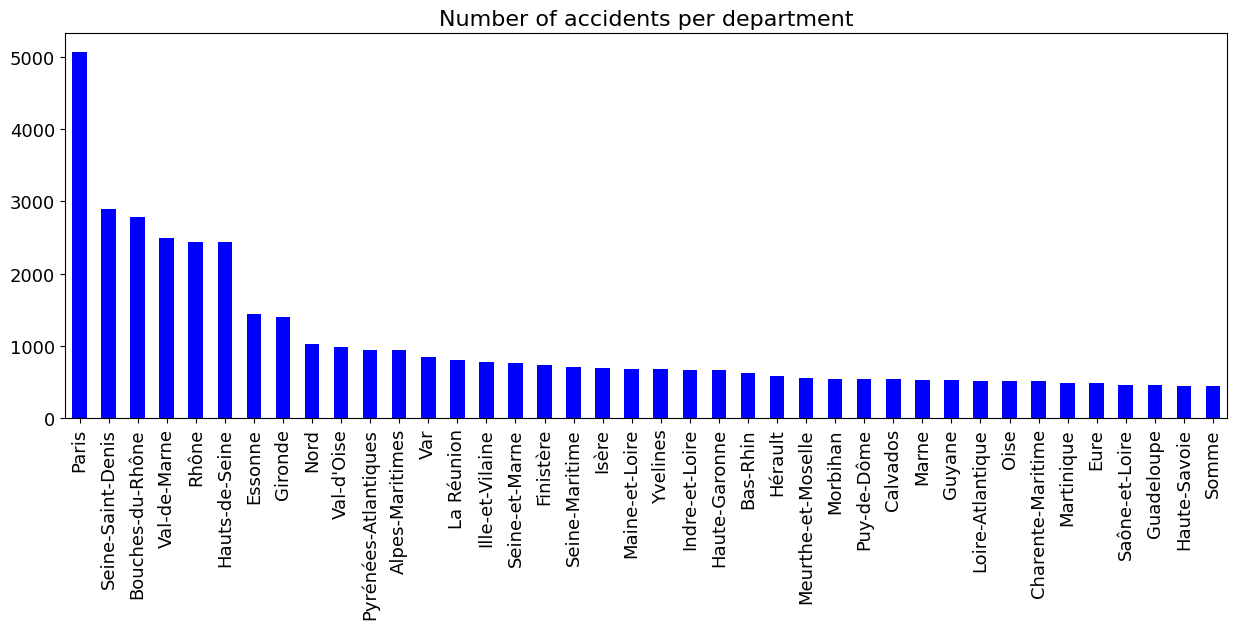

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,5))

caracs.dep.map(DEPARTMENTS).value_counts()[:40].plot.bar(color = 'blue', fontsize=13);
ax1.set_title("Number of accidents per department", fontsize=16);
# Show curve
plt.show();

The most of accidents happends in french departments with the following capitals: Paris, Bobigny, Marseille, Créteil, Lyon, Nanterre, Évry and Bordeaux. 

Let's analyse Paris, Marseille, Lyon and Bordeaux department regarding the Week Day of the accident.

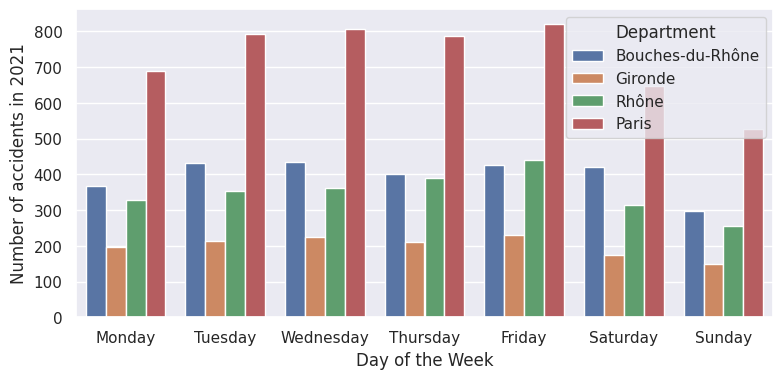

In [11]:
df = caracs[caracs.dep.isin(['75', '33', '69', '13'])][['weekday', 'dep', 'Num_Acc']].groupby(['weekday', 'dep']).count()

df = df.reset_index()
df.dep = df.dep.map(DEPARTMENTS)
df.weekday = df.weekday.map(WEEKDAYS)

sns.set(rc={"figure.figsize":(9, 4)})
# plot barplot
g = sns.barplot(x="weekday",
           y='Num_Acc',
           hue="dep",
           data=df);

plt.legend(title='Department', loc='upper right')
plt.xlabel('Day of the Week')
plt.ylabel('Number of accidents in 2021')
plt.show(g)

### Explore Users

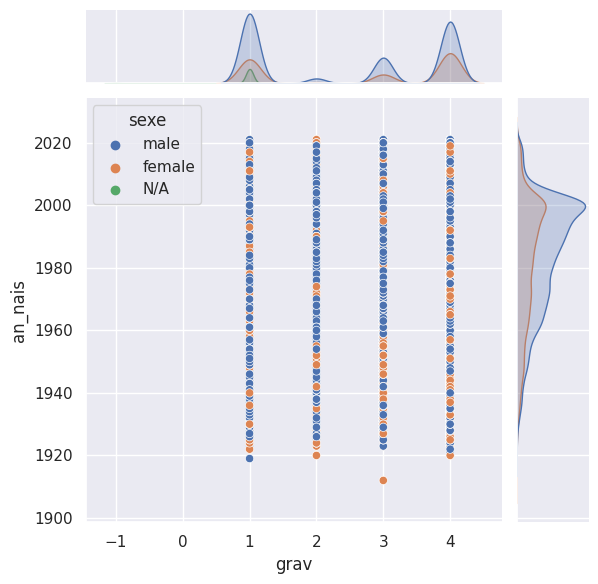

In [12]:
users.sexe = users.sexe.map({1: 'male', 2: 'female', -1: 'N/A'})
sns.jointplot(data=users, x="grav", y="an_nais", hue='sexe');
# Show curve
plt.show();

In [13]:
tot_klld = users[users.grav == 2].shape[0]
print("# of person died in 2021: ", tot_klld);

# of person died in 2021:  3219


In [14]:
prct_klld = round(users[users.grav == 2].shape[0]/users.grav.shape[0]*100, 1)
print(f"This represents {prct_klld}% of total quantity involved in any road accident")

This represents 2.5% of total quantity involved in any road accident


In [15]:
print(f"Number of pedestrians died: {users[(users.grav == 2) & (users.catu == 3)].shape[0]}")

Number of pedestrians died: 459


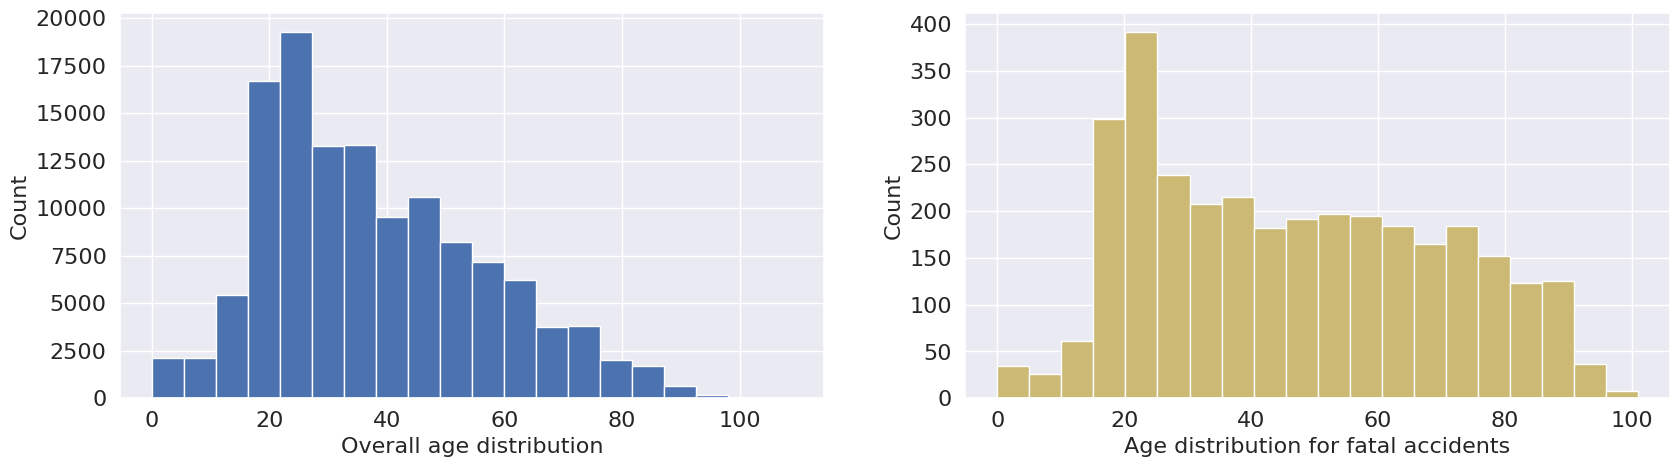

In [16]:
# prepare a figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

users.an_nais.apply(lambda x: -x + 2021).plot.hist(ax=ax1, bins=20, color='b',fontsize=16)
ax1.set_xlabel("Overall age distribution", fontsize=16);
ax1.set_ylabel("Count", fontsize=16);

users[users.grav == 2].an_nais.apply(lambda x: -x + 2021).plot.hist(ax=ax2, bins=20, color='y', fontsize=16)
ax2.set_xlabel("Age distribution for fatal accidents", fontsize=16);
ax2.set_ylabel("Count", fontsize=16);
# Show curve
plt.show();

In [17]:
res = 0
for i in range(30):
    res += users[users.grav == 2].an_nais.apply(lambda x: -x + 2021).value_counts()[i]
print(f"{round(res/tot_klld*100,1)} % were aged below 30")

31.0 % were aged below 30


In [18]:
tot_injrd = users[(users.grav == 3) | (users.grav == 4)].shape[0]
unhrt = users[(users.grav == 1)].shape[0]
print(f"Survived: {round(tot_injrd/users.shape[0]*100,1)} %")
print(f"Unhurt: {round(unhrt/users.shape[0]*100,1)} %")

Survived: 54.8 %
Unhurt: 42.7 %


Good news is that 55% of involved are survived after an accident. And 43 % were free from any injuries.

### Explore Locations

In [19]:
# Create GeoPandas dataframe 
caracs_gdf = geopandas.GeoDataFrame(
    caracs, geometry=geopandas.points_from_xy(caracs.long, caracs.lat))

# Load world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

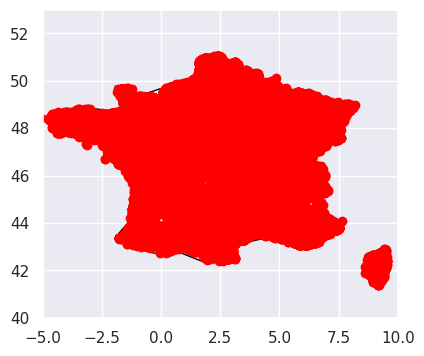

In [20]:
# restricting to France
ax = world[(world.continent == 'Europe') & (world.name == 'France')].plot(
    color='white', edgecolor='black')

ax.set_ylim(40,53)
ax.set_xlim(-5,10)
caracs_gdf.plot(ax=ax, color='red')

plt.show()



The map of accidents covers the whole territory of the country. From this scale we can't analyse much. Let's try to visualise only accidents with fatal consequences.

Let's filter accident's ID with at least one death (fatal).


In [21]:
### Filter locations of fatal incidents
locs_grav_gdf = caracs[caracs.Num_Acc.isin(users[(users.grav == 2)].Num_Acc.drop_duplicates())]
locs_grav_gdf_out_agg = locs_grav_gdf[locs_grav_gdf['agg'] == 2]

locs_grav_gdf_out_agg = geopandas.GeoDataFrame(
    locs_grav_gdf_out_agg, geometry=geopandas.points_from_xy(locs_grav_gdf_out_agg.long, locs_grav_gdf_out_agg.lat))

In [22]:
def plot_france_loc(locations, title=" ", color='red'):
  """Plot a map with geo-coordinates """
  ax = world[(world.continent == 'Europe') & (world.name == 'France')].plot(
      color='white', edgecolor='black')

  ax.set_ylim(40,53)
  ax.set_xlim(-5,10)

  colormap = 'rbgo'

  if type(locations) == list:
    i = 0
    for loc in locations:
      loc.plot(ax=ax, color=colormap[i])
      i += 1
  else: 
    locations.plot(ax=ax, color=color)

  ax.set_title(title)
  plt.show()


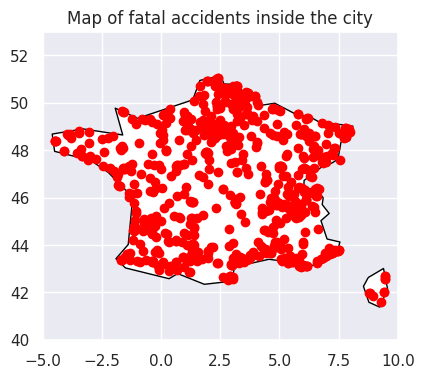

Totaling: 1036


In [23]:
plot_france_loc(locs_grav_gdf_out_agg, "Map of fatal accidents inside the city")

print(f"Totaling: {len(locs_grav_gdf_out_agg)}")

In [24]:
print(f"Most of accidents in average is taking place within the city area ({round(caracs['agg'].value_counts()[2]/len(caracs)*100,2)} %)")

Most of accidents in average is taking place within the city area (64.26 %)


Let's add to this visualization places with more then two deaths :

In [25]:
indcs = []
ac_count_fatal = users[users.grav==2].Num_Acc.value_counts()
for i, k in enumerate(ac_count_fatal):
  if k >= 2:
    indcs.append(ac_count_fatal.index[i])

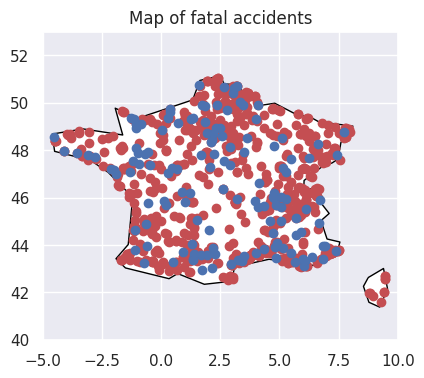

Totaling: 151 locations with (>= 2 deaths)


In [26]:
fatal_accidents_gdf = geopandas.GeoDataFrame(
    caracs[caracs.Num_Acc.isin(indcs)], geometry=caracs[caracs.Num_Acc.isin(indcs)].geometry)

plot_france_loc([locs_grav_gdf_out_agg, fatal_accidents_gdf], "Map of fatal accidents")

#plot_france_loc(locs_grav_gdf_out_agg, "Map of fatal accidents inside the city", color='g')

print(f"Totaling: {len(fatal_accidents_gdf)} locations with (>= 2 deaths)")

* What was the predominant lightconditions in those accidents?

In [27]:
caracs[caracs.Num_Acc.isin(indcs)].lum.value_counts()

1    79
3    47
5    12
2    11
4     2
Name: lum, dtype: int64

The dramatic accidents were happened predominantly during the day or on the road without street lighting

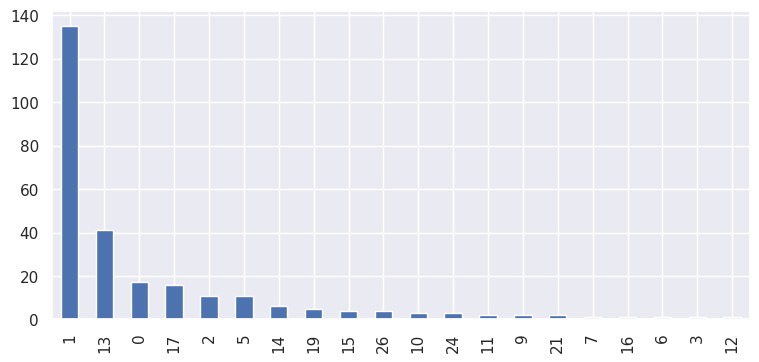

In [28]:
vehicles[vehicles.Num_Acc.isin(indcs)].manv.value_counts().plot.bar()
plt.show();

Main manever before the accident was 1 - without changing the direction and 13 - being deported to the left.


Let's analyse the places and conditions where accidents happend the most often...


### Explore Circumstances

In [29]:
### Merge dataset
a=pd.merge(users,vehicles,on='Num_Acc')
b=pd.merge(a,caracs,on='Num_Acc')
data=pd.merge(b,places,on='Num_Acc')


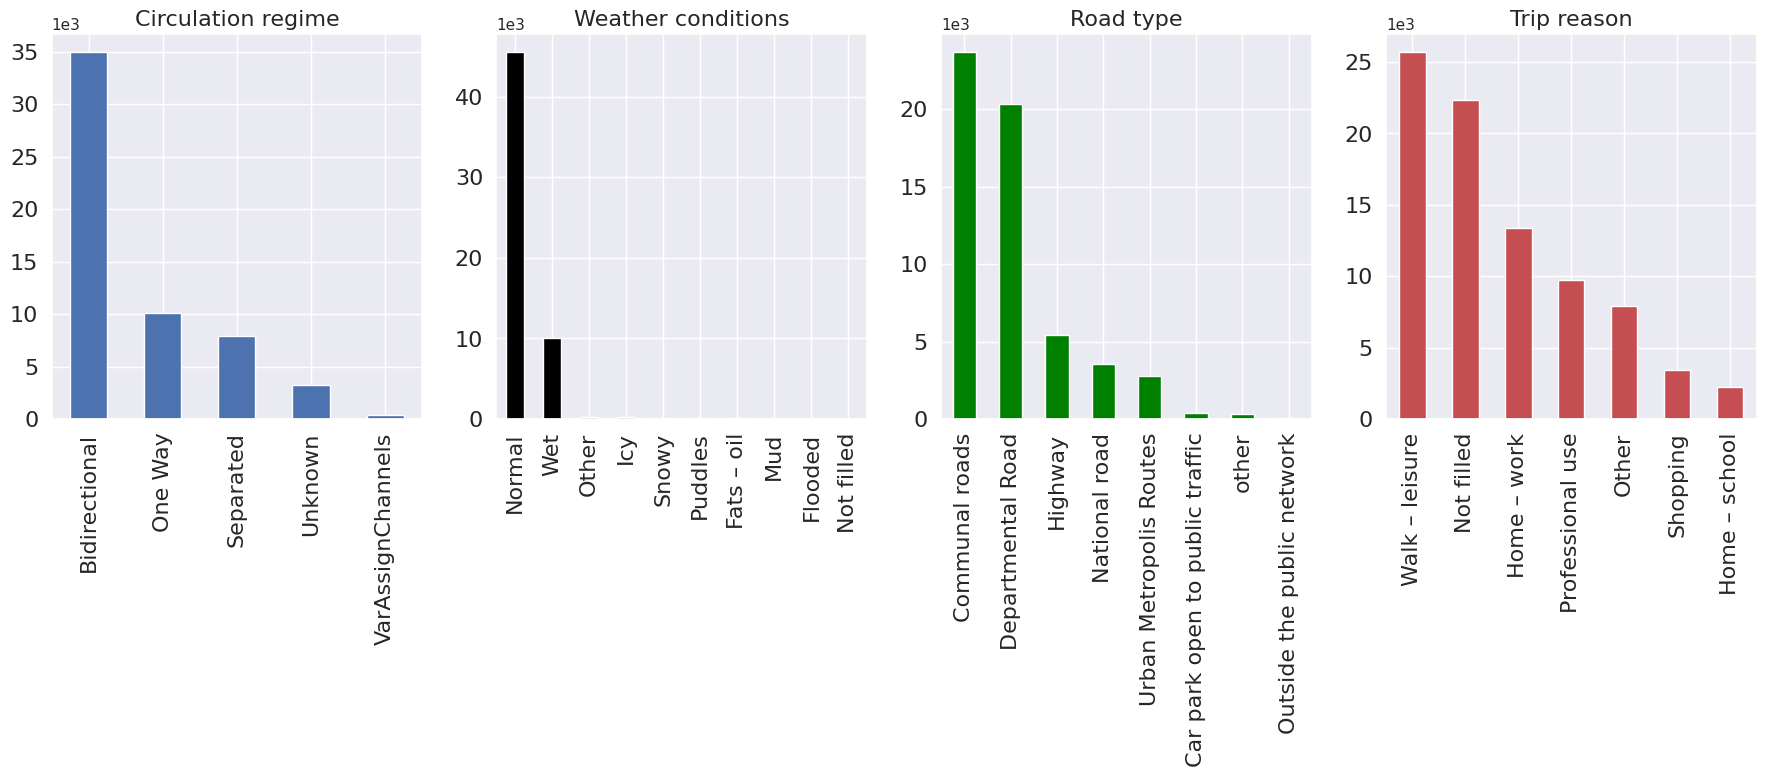

In [30]:
# prepare a figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22,5))

# Circulation regime
circ = {-1:"Unknown", 1:"One Way", 2:"Bidirectional", 3:"Separated", 4:"VarAssignChannels"}
data[["circ", "Num_Acc"]].drop_duplicates()["circ"].map(circ).value_counts().plot.bar(ax=ax1, fontsize=16);
ax1.set_title("Circulation regime", fontsize=16)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

# Weather conditions
surf = {-1 :"Not filled", 1 :"Normal", 2 :"Wet", 3 :"Puddles", 4 :"Flooded", 5 : "Snowy", 6 :"Mud", 7 :"Icy", 8 :"Fats – oil", 9 :"Other"}
data[["surf", "Num_Acc"]].drop_duplicates()["surf"].map(surf).value_counts().plot.bar(ax=ax2, color='black', fontsize=16);
ax2.set_title("Weather conditions", fontsize=16)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

# Road type
road = {1 :"Highway", 2 :"National road", 3 :"Departmental Road", 4 :"Communal roads", 5 :"Outside the public network", 6 :"Car park open to public traffic", 7 :"Urban Metropolis Routes", 9 :"other"}
data[["catr", "Num_Acc"]].drop_duplicates()["catr"].map(road).value_counts().plot.bar(ax=ax3, color="green", fontsize=16);
ax3.set_title("Road type", fontsize=16)
ax3.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

# Trip reason
traject = {-1 :"Not filled", 0 :"Not filled", 1 :"Home – work", 2 :"Home – school", 3 :"Shopping", 4 :"Professional use", 5 :"Walk – leisure", 9 :"Other"}
data[["trajet", "Num_Acc"]].drop_duplicates()["trajet"].map(traject).value_counts().plot.bar(ax=ax4, color='r', fontsize=16);
ax4.set_title("Trip reason", fontsize=16);
ax4.ticklabel_format(axis='y', style='sci', scilimits=(3,3))

plt.show();

As seen from the graph, most of the accidents happened on bidirectional circulation, on the flat and straight road during the normal weather conditions.

*to be continued...*